<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/introduction-to-machine-learning-for-finance/blob/main/2022/1-notebooks/chapter-4-2.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Supervised Models: Decision Trees

## What is a decision tree?

Decision trees can be used for regression (continuous real-valued output, e.g. predicting the price of a house) or classification (categorical output, e.g. predicting email spam vs. no spam), but here we will focus on classification. **A decision tree classifier is a binary tree where predictions are made by traversing the tree from root to leaf — at each node, we go left if a feature is less than a threshold, right otherwise. Finally, each leaf is associated with a class, which is the output of the predictor**.

### Why Decision Trees?

- Decision tress often mimic the human level thinking so its so simple to understand the data and make some good interpretations;

- Decision trees actually make you see the logic for the data to interpret(not like black box algorithms like SVM,NN,etc..);

- There is non requirement that the relationship between the target and the features be linear;

- The tree automatically selects the best features to make the prediction;

- A decision tree is less sensitive to outlying observations than a regression.

For example : if we are classifying bank loan application for a customer, the decision tree may look like this
Here we can see the logic how it is making the decision.

<img src="../05-pictures/lesson-3-3_pic_0.png" width=600 height=200 />

It’s simple and clear.
So what is the decision tree?

## Building a Decision Tree

During model training on feature-target relationships, a tree is grown from a **root** (parent) node (all data containing feature-target relationships), which is then recursively split into child nodes (subset of the entire data) in a binary fashion. Generally, each split is performed on a single feature in the parent node. You will have different kind of splitting depending on the nature of the feature: 

- you can have a very simple decision tree in which the decision is a boolean condition (true, false) ... 
- ... or numeric data

In the last case we have to define a desired **threshold** value of the feature. For instance, during each split of the parent node, we go to left node (with the corresponding subset of data) if a feature is less than the threshold, and right node otherwise. But how do we decide on the split? The feature to put at the root node is the one with the most **information gain**. 

### The Impurity Concept

Decision trees use the concept of **impurity** to describe how homogeneous or “pure” a node is. **A node is pure if all its samples belong to the same class**, while **a node with many samples from many different classes is called impure**. The difference between the impurity of a node and that of the child nodes is called **Information Gain**. 

The goal of a decision tree is, at each layer, to try to split the data into two (or more) groups, **so that data that fall into the same group are most similar to each other (homogeneity), and groups are as different as possible from each other (heterogeneity)**.

In order to split the nodes at the most informative features, we need to define an
objective function that we want to optimize via the tree learning algorithm. Here,
our objective function is to maximize the **IG** at each split, which we define as follows:

\begin{equation}
IG(D_p, f) = I(D_p) - \sum\limits_{j=1}^m \frac{N_j}{N_p} I(D_j)
\end{equation}

Here, 

- $f$ is the feature to perform the split; 
- $𝐷_𝑝$ and $𝐷_𝑗$ are the dataset of the parent and $jth$ child node; 
- $I$ is our impurity measure; 
- $𝑁_𝑝$ is the total number of training examples at the parent node; 
- and $𝑁_𝑗$ is the number of examples in the jth child node. 

As we can see, the information gain is simply the difference between the impurity of the parent
node and the sum of the child node impurities—the lower the impurities of the child
nodes, the larger the information gain. However, for simplicity and to reduce the
combinatorial search space, most libraries (including scikit-learn) implement binary
decision trees. This means that each parent node is split into two child nodes, $D_{left}$
and $D_{right}$:

\begin{equation}
IG(D_p, f) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) -
\frac{N_{right}}{N_p} I(D_{right})
\end{equation}

### Measures of Information Gain

The three impurity measures or splitting criteria that are commonly used in binary
decision trees are **Entropy** $(𝐼_𝐻)$, **Gini impurity** $(𝐼_𝐺)$ and the **Classification Error** $(𝐼_𝐸)$. In the following we will focus only on the first two.

#### Entropy

One measure of information gain is based on *entropy*. 

Suppose that there are $n$ possible outcomes and $p_i$ is the probability of outcome $i$ with $\sum\limits_{i=1}^n\, p_i=1$, entropy can be defined as: $$\text{Entropy}=-\sum\limits_{i=1}^n\, p_i \,\ln(p_i)$$


Let's take a very simple example in order to clarify the concept of omogeneity and how entropy can help us to measure it.

<img src="../05-pictures/lesson-3-3_pic_1.png" width=600 height=100 />

Here our target attribute is going to classify star versus diamond. We've got about half stars and half diamonds as a matter of fact we have 49 objects in the box and 24 of them are stars 25 of them are diamonds. You'll also notice that we have color codes here so not all of the diamonds are blue, there are some orange diamonds and some blue diamonds and then there are also some orange stars and some blue stars. So our **partition** might be on color. We're interested in predicting star versus diamond. Our partition then we'll be on the color and so we'll create an orange box and a blue box and then what we'll say here is it's very very much easier to predict whether it will be a star or a diamond in each of these two boxes compared to the original total data set so there's a lot less omogeneity here so we would expect to have a significant information gain when we partition on color.

<img src="../05-pictures/lesson-3-3_pic_2.png" width=600 height=100 />

Let's see how **entropy can give us a measure of how well we have splitted our sample**. Now there are 25 orange objects 21 of which are stars and there are 24 blue objects three of which are stars. We'll calculate the full group entropy first:  

$$E(\vec d) = -\sum_i p_i \log(p_i) =  -(p_1 \log(p_1) + p_2 \log(p_2))$$  

Let's plug those numbers in. So again for diamond there were 24 out of 49 diamonds and  there were 25 stars   

$$E=-\left(\frac{24}{49}\log\left(\frac{24}{49}\right) + \frac{25}{49} \log\left(\frac{25}{49}\right)\right) \sim 0.9997$$  
we get an entropy for the full group of about $0.9997$. For the orange box then let's calculate the entropy just within that box. It's the same process but in this case again we have diamonds and we have stars there are four diamonds and 21 stars out of 25 objects in the orange box so we have:   
 
\begin{align*} 
E(\vec d, \text{orange}) &= -\sum_i p_i \log(p_i) \\ &=-(p_1 \log(p_1) + p_2 \log(p_2)) \\ &=-\left(\frac{4}{25}\log\left(\frac{4}{25}\right) + \frac{21}{25} \log\left(\frac{21}{25}\right)\right) \\ &\sim 0.6343 
\end{align*}  

the entropy within the orange box is $0.6343$ which is quite a bit lower. There's a lot more omogeneity. The blue box works very similar. Again it's the same formula so you've got 21 diamonds out of 24 and you've got 3 stars out of 24 so:   

\begin{align*} 
E(\vec d, \text{blue}) &= -\sum_i p_i \log(p_i) \\ &=-(p_1 \log(p_1) + p_2 \log(p_2)) \\ &=-\left(\frac{21}{24}\log\left(\frac{21}{24}\right) + \frac{3}{24} \log\left(\frac{3}{24}\right)\right) \\ &\sim 0.5436 
\end{align*}

In the blue box the entropy is actually $0.5436$ even more omogeneity in the blue box because we only have those 3 diamonds. The combined entropy is going to be the weighted average so there were 25 orange objects out of 49 so we do $25/49$ times the entropy of the orange group and then we do $24/49$ times the entropy of the blue group add those together we get the weighted average of the entropy   

\begin{align*} 
E(\vec d, \vec a) &= \frac{25}{49} E(\text{orange}) + \frac{24}{49} E(\text{blue}) \\ &= \frac{25}{49} (0.6343) + \frac{24}{49} (0.5436) = 0.5899 
\end{align*}

<img src="../05-pictures/lesson-3-3_pic_3.png" width=600 height=100 />

Our information gain then is the original entropy, which is about $0.9997$ minus the weighted average of the entropies across the partitions 
by color which was $0.5899$ so our information gained is about $0.4097$  

$$ I(\vec d, \vec a) = E(\vec d) - E(\vec d, \vec a) = 0.9997 - 0.5899 = 0.4097 $$  

that's a substantial information gain and again just visually to remind you what that means by partitioning on color if I then know which 
colored box I'm in it's much easier for me to make an accurate prediction of what I'm likely to draw out whereas in the original box it was 
about 50/50 right twenty five stars twenty four diamonds pick one at random I'm almost as likely to get a diamond as I am a star so 
partitioning on color makes it much easier for us to do that prediction of whether it'll be star or diamond.

Let's do another example. Let's suppose some data for job application and we find that the 20% of them received an offer. Suppose further that 50% of job applicants have a relevant degree. If both those with a relevant degree and those without a relevant degree had a 20% chance of receiving a job offer, there would be no information gain to knowing wheter an applicant has a relevant degree. Suppose however that:
- 30% of those with a relevant degree received a job offer
- 10% of those without a relevant degree received a job offer

then there is clearly some information gain to knowing whether an applicant has a relevant degree. Let's calculate the information gain with entropy as a measure. 

In [1]:
import math

# initial entropy, the only information we have is that 20% of applicants find a job
p = 0.2

entropy_ini = -p*math.log(p) - (1-p)*math.log(1-p)
print(entropy_ini)

0.5004024235381879


If a candidate has a relevant degree this becomes

In [2]:
p = 0.3

entropy_1 = -p*math.log(p) - (1-p)*math.log(1-p)
print(entropy_1)

0.6108643020548935


if a candidate does not have a relevant degree:

In [3]:
p = 0.1

entropy_2 = -p*math.log(p) - (1-p)*math.log(1-p)
print(entropy_2)

0.3250829733914482


Because 50% of candidates have a relevant degree, the expected value of entropy after it is determined whether a candidate has a relevant degree is

In [4]:
entropy_exp = .5*entropy_1 + 0.5*entropy_2
print('Expected Entropy = ' + str(entropy_exp) + '\n')
#
# Now we can easily calculate the expected uncertainty reduction as:
#
print('Information Gain = ' + str(entropy_ini - entropy_exp))

Expected Entropy = 0.46797363772317085

Information Gain = 0.032428785815017014


When constructing the decision tree, we first search for the feature that has the biggest information gain. This is put at the root of the tree. For each branch emanating from the root we then search for a feature (other than the one at the root) that has the biggest information gain and so on ...

#### Gini Impurity

An alternative to entropy for quantifying information gain is the Gini Impurity, which is basically a concept to quantify how homogeneous or “pure” a node is, with relation to the distribution of the targets in the node. A node is considered pure (G=0) if all training samples in the node belong to the same class, while a node with many training samples from many different classes will have a Gini Impurity close to 1.

\begin{equation}
G = 1 - \sum\limits_{k=1}^n p_k^2 = 1 - \sum\limits_{k=1}^n \left( \frac{m_k}{m} \right)^2 
\end{equation}

where $p_k$ is the fraction of samples belonging to class $k$, $n$ is the number of classes, $m$ are all the training samples in the node and $m_k$ are the training examples in each class.

For example if a node contains five samples, with two of class 1, two of class 2, one of class 3 and none of class 4, then

$$G = 1 - \left( \frac{2}{5} \right)^2 - \left( \frac{2}{5} \right)^2  - \left( \frac{1}{5} \right)^2  = 0.64$$

#### Comparison 

For a more visual comparison of the three different impurity criteria that we
discussed previously, let's plot the impurity indices for the probability range $[0, 1]$
for class 1.

Text(0, 0.5, 'impurity index')

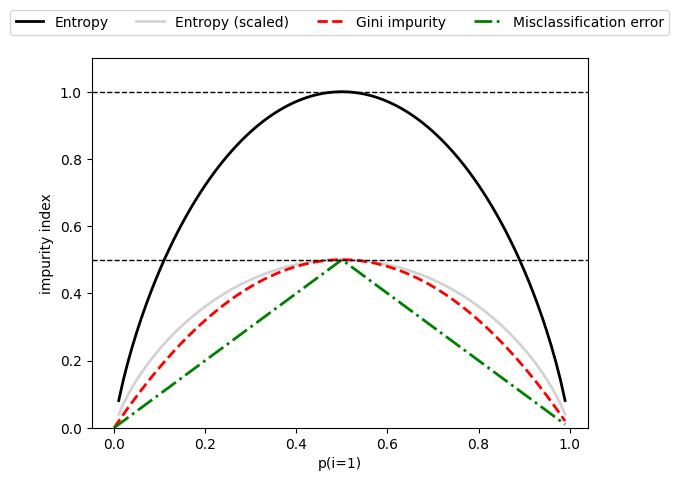

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
    ['Entropy', 'Entropy (scaled)',
    'Gini impurity',
    'Misclassification error'],
    ['-', '-', '--', '-.'],
    ['black', 'lightgray',
    'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab,
    linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')

## Application to Credit Decision (Hull J. C. Chapter 4)

In [7]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score

We now apply the decision tree approach using the entropy method to the Lending Club Data Introduced in chapter 4.1. 

In [8]:
#
# load file lendingclub_traindata.xlsx
#
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [9]:
train = pd.read_excel(path + 'lendingclub_traindata.xlsx', engine='openpyxl')
# 1 = good, 0 = default
print(train.head())

   home_ownership  income    dti  fico_low  loan_status
0               1  44.304  18.47       690            0
1               0  38.500  33.73       660            0
2               1  54.000  19.00       660            0
3               1  60.000  33.98       695            0
4               0  39.354  10.85       685            0


In [10]:
# remove target column to create feature only dataset
X = train.drop('loan_status',axis=1)
# store target column
y = train['loan_status']
print(X.shape, y.shape)

(8695, 4) (8695,)


### Step-by-Step Analysis

Remember that without any further information, the probability of a good loan is about 82.76%, infact we have a total of 8695 observations ot those 7196 were for good loans and 1499 were for the bad loans that defaulted.

In [11]:
majority_class = y.mode()[0]        # predict fully paid only
prediction = np.full(shape=y.shape, fill_value=majority_class)
p_good = accuracy_score(y, prediction)
print("p good = %s%%" % round(100*p_good,2))
print("p  bad = %s%%" % round(100*(1 - p_good),2))

p good = 82.76%
p  bad = 17.24%


The initial entropy is therefore

In [12]:
entropy_ini = -p_good * math.log(p_good) - (1-p_good)* math.log(1-p_good)
print(entropy_ini)

0.45966813572655896


We will consider the same four features and same data as in the previous notebook:

- A categorical variable indicating wheter the applicant rests or owns a home
- The applicant's income
- The applicant's debt to income ratio (dti)
- The applicantion credit score (FICO)

In [13]:
#X.columns = ['Owns Home','Income','dti','FICO']

First of all let's make a step-by-step calculation before use the magic of scikit-learn library. Let's calculate the percentage of applicants that own their house

#### Assuming Home Ownership as Root

In [14]:
owners = train[train['home_ownership'] == 1]
renter = train[train['home_ownership'] == 0]

owners_perc = owners.shape[0]/X.shape[0]
print('App Owner = ' + str(owners_perc))
print('App Rent  = ' + str(1-owners_perc))

App Owner = 0.5913743530764808
App Rent  = 0.4086256469235192


Then find the percentage of loans that were good for applicants that own their house and for applicants that rent their house

In [15]:
#
# Find the number of loans that were good for owners
#
n1 = owners[owners['loan_status']==1]
p1 = n1.shape[0] / owners.shape[0]
print(p1)

0.8444185141968106


In [16]:
#
# Find the number of loans that were good for renters
#
n2 = renter[renter['loan_status']==1]
p2 = n2.shape[0] / renter.shape[0]
print(p2)

0.8032648466084998


The expected entropy if home ownership (*but no other feature*) becomes known is therefore:

In [17]:
entropy_exp = -owners_perc*(p1*math.log(p1) + (1-p1)*math.log(1-p1)) - (1-owners_perc)*(p2*math.log(p2) + (1-p2)*math.log(1-p2))
print(entropy_exp)

0.4582474114672313


The expected reduction in entropy is therefore a modest:

In [18]:
print(entropy_ini - entropy_exp)

0.0014207242593276548


In [19]:
results = pd.DataFrame(columns=('Feature','Treshold','Expected H', 'IG'))
results.loc[0] = ['Home Ownership', 0, entropy_exp, entropy_ini - entropy_exp]

#### Assuming Applicant's Income as Root

The calculation of the expected reduction in entropy from Income **requires the specification of a threshold income**. Define

- $p_1$ : probability that income is greater than the threshold
- $p_2$ : probability that, if income is greater than the threshold, the borrower does not default
- $p_3$ : probability that if income is less than the threshold the borrower does not default

The expected entropy is

$$\hat E = p_1\left[ -p_2 \, \log(p_2) - (1-p_2)\, \log(1-p_2) \right] + (1-p_1)\left[-p_3\, \log(p_3) - (1-p_3)\,\log(1-p_3)\right]$$

In [20]:
#
# p1 computation
#
threshold = 50
# applicants with income grater than the threshold
sample_1 = train[train['income'] >  threshold] 
# applicants with income less than the threshold
sample_2 = train[train['income'] <= threshold]
# applicants with income greater than the threshold which dont default
sample_3 = sample_1[sample_1['loan_status']==1]
# applicants with income less than the threshold which dont default
sample_4 = sample_2[sample_2['loan_status']==1]

p1 = sample_1.shape[0] / train.shape[0]
p2 = sample_3.shape[0] / sample_1.shape[0]
p3 = sample_4.shape[0] / sample_2.shape[0]

print(p1)
print(p2)
print(p3)

0.6803910293271995
0.8466869506423259
0.7869737315581145


In [21]:
entropy_exp = p1*(-p2*math.log(p2) - (1-p2)*math.log(1-p2)) + (1-p1)*(-p3*math.log(p3) - (1-p3)*math.log(1-p3))
print(entropy_exp)

0.45702631325619647


We can make a function which takes as input a threshold and return the entropy

In [22]:
def ExpectedEntropy1(threshold, df):
    s1 = df[df['income'] >  threshold] 
    # applicants with income less than the threshold
    s2 = df[df['income'] <= threshold]
    # applicants with income greater than the threshold which dont default
    s3 = s1[s1['loan_status']==1]
    # applicants with income less than the threshold which dont default
    s4 = s2[s2['loan_status']==1]

    p1 = s1.shape[0] / df.shape[0]
    p2 = s3.shape[0] / s1.shape[0]
    p3 = s4.shape[0] / s2.shape[0]
    
    e = p1*(-p2*math.log(p2) - (1-p2)*math.log(1-p2)) + (1-p1)*(-p3*math.log(p3) - (1-p3)*math.log(1-p3))
    return(e)

# sanity check
print(ExpectedEntropy1(50, train))


0.45702631325619647


We carry out an iterative search to determine the value of the threshold that minimizes this expected entropy for the training set

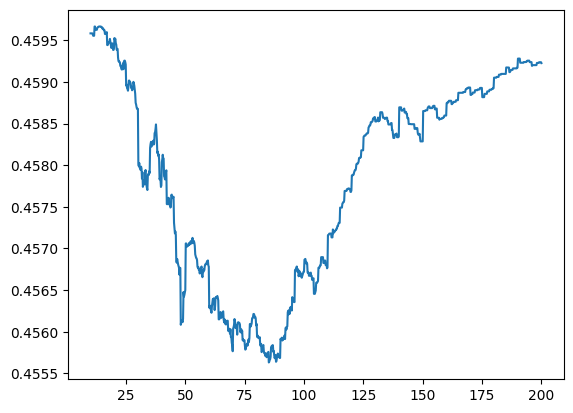

In [23]:
import matplotlib.pyplot as plt

# 100 linearly spaced numbers
xps = np.linspace(10,200,1000)
yps = []
for xp in xps:
    yps.append(ExpectedEntropy1(xp, train))
    
yps = np.array(yps)    

plt.plot(xps, yps)

In [24]:
minimum = np.where(yps == np.amin(yps))
xps_min = xps[minimum][0]
print(xps_min)
print(ExpectedEntropy1(xps_min, train))

85.12512512512512
0.4556300235689159


In [25]:
entropy_exp = ExpectedEntropy1(85.193, train) 
print(entropy_exp)
print(entropy_ini - entropy_exp)

0.4556300235689159
0.004038112157643048


In [26]:
results.loc[1] = ['Income',xps_min, entropy_exp, entropy_ini - entropy_exp]

#### Assuming Applicant's dti (debt to income ratio) as Root

In [27]:
def ExpectedEntropy2(threshold, df):
    s1 = df[df['dti'] >  threshold] 
    # applicants with income less than the threshold
    s2 = df[df['dti'] <= threshold]
    # applicants with dti greater than the threshold which dont default
    s3 = s1[s1['loan_status']==1]
    # applicants with dti less than the threshold which dont default
    s4 = s2[s2['loan_status']==1]

    p1 = s1.shape[0] / df.shape[0]
    p2 = s3.shape[0] / s1.shape[0]
    p3 = s4.shape[0] / s2.shape[0]
    
    e = p1*(-p2*math.log(p2) - (1-p2)*math.log(1-p2)) + (1-p1)*(-p3*math.log(p3) - (1-p3)*math.log(1-p3))
    return(e)

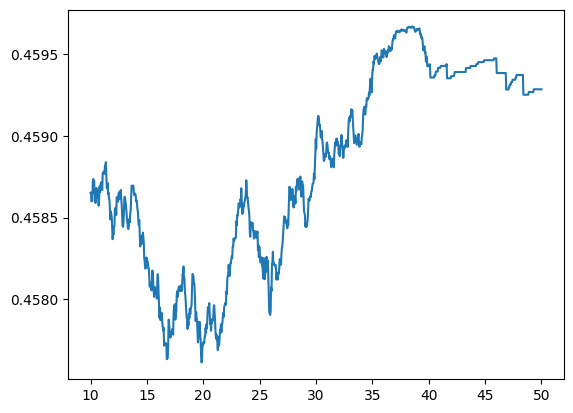

In [28]:
# 100 linearly spaced numbers
xps = np.linspace(10,50,1000)
yps = []
for xp in xps:
    yps.append(ExpectedEntropy2(xp, train))
    
yps = np.array(yps)    

plt.plot(xps, yps)

In [29]:
minimum = np.where(yps == np.amin(yps))
xps_min = xps[minimum][0]

entropy_exp = ExpectedEntropy2(xps_min, train) 

print(xps_min)
print(entropy_exp)
print(entropy_ini - entropy_exp)

19.84984984984985
0.45761406059416887
0.0020540751323900874


In [30]:
results.loc[2] = ['dti',xps_min, entropy_exp, entropy_ini - entropy_exp]

#### Assuming Applicant's FICO as Root

In [31]:
def ExpectedEntropy3(threshold, df):
    s1 = df[df['fico_low'] >  threshold] 
    # applicants with income less than the threshold
    s2 = df[df['fico_low'] <= threshold]
    # applicants with fico greater than the threshold which dont default
    s3 = s1[s1['loan_status']==1]
    # applicants with fico less than the threshold which dont default
    s4 = s2[s2['loan_status']==1]

    p1 = s1.shape[0] / df.shape[0]
    p2 = s3.shape[0] / s1.shape[0]
    p3 = s4.shape[0] / s2.shape[0]
    
    e = p1*(-p2*math.log(p2) - (1-p2)*math.log(1-p2)) + (1-p1)*(-p3*math.log(p3) - (1-p3)*math.log(1-p3))
    return(e)

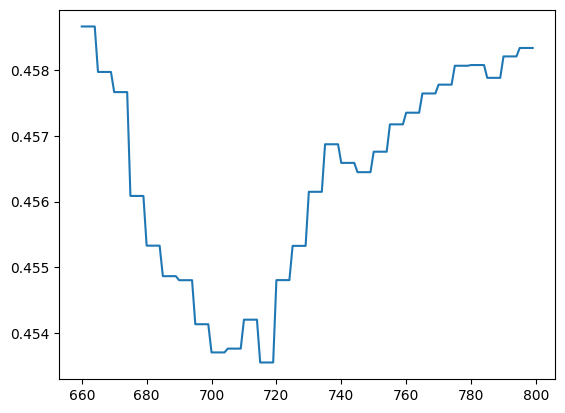

In [32]:
a = train['fico_low'].min()

xps = np.arange(a, 800)
yps = []

for xp in xps:
    yps.append(ExpectedEntropy3(xp, train))
    
yps = np.array(yps)    

plt.plot(xps, yps)

In [33]:
minimum = np.where(yps == np.amin(yps))
xps_min = xps[minimum][0]

entropy_exp = ExpectedEntropy3(xps_min, train) 

print(xps_min)
print(entropy_exp)
print(entropy_ini - entropy_exp)

715
0.45355502172339535
0.006113114003163611


In [34]:
results.loc[3] = ['FICO',xps_min, entropy_exp, entropy_ini - entropy_exp]

In [35]:
results

,Feature,Treshold,Expected H,IG
0,Home Ownership,0.000000,0.458247,0.001421
1,Income,85.125125,0.455630,0.004038
2,dti,19.849850,0.457614,0.002054
3,FICO,715.000000,0.453555,0.006113


The FICO score with a threshold of 715 has the greatest information gain. It is therefore put at the node of the three.

### Using the DecisionTreeClassifier

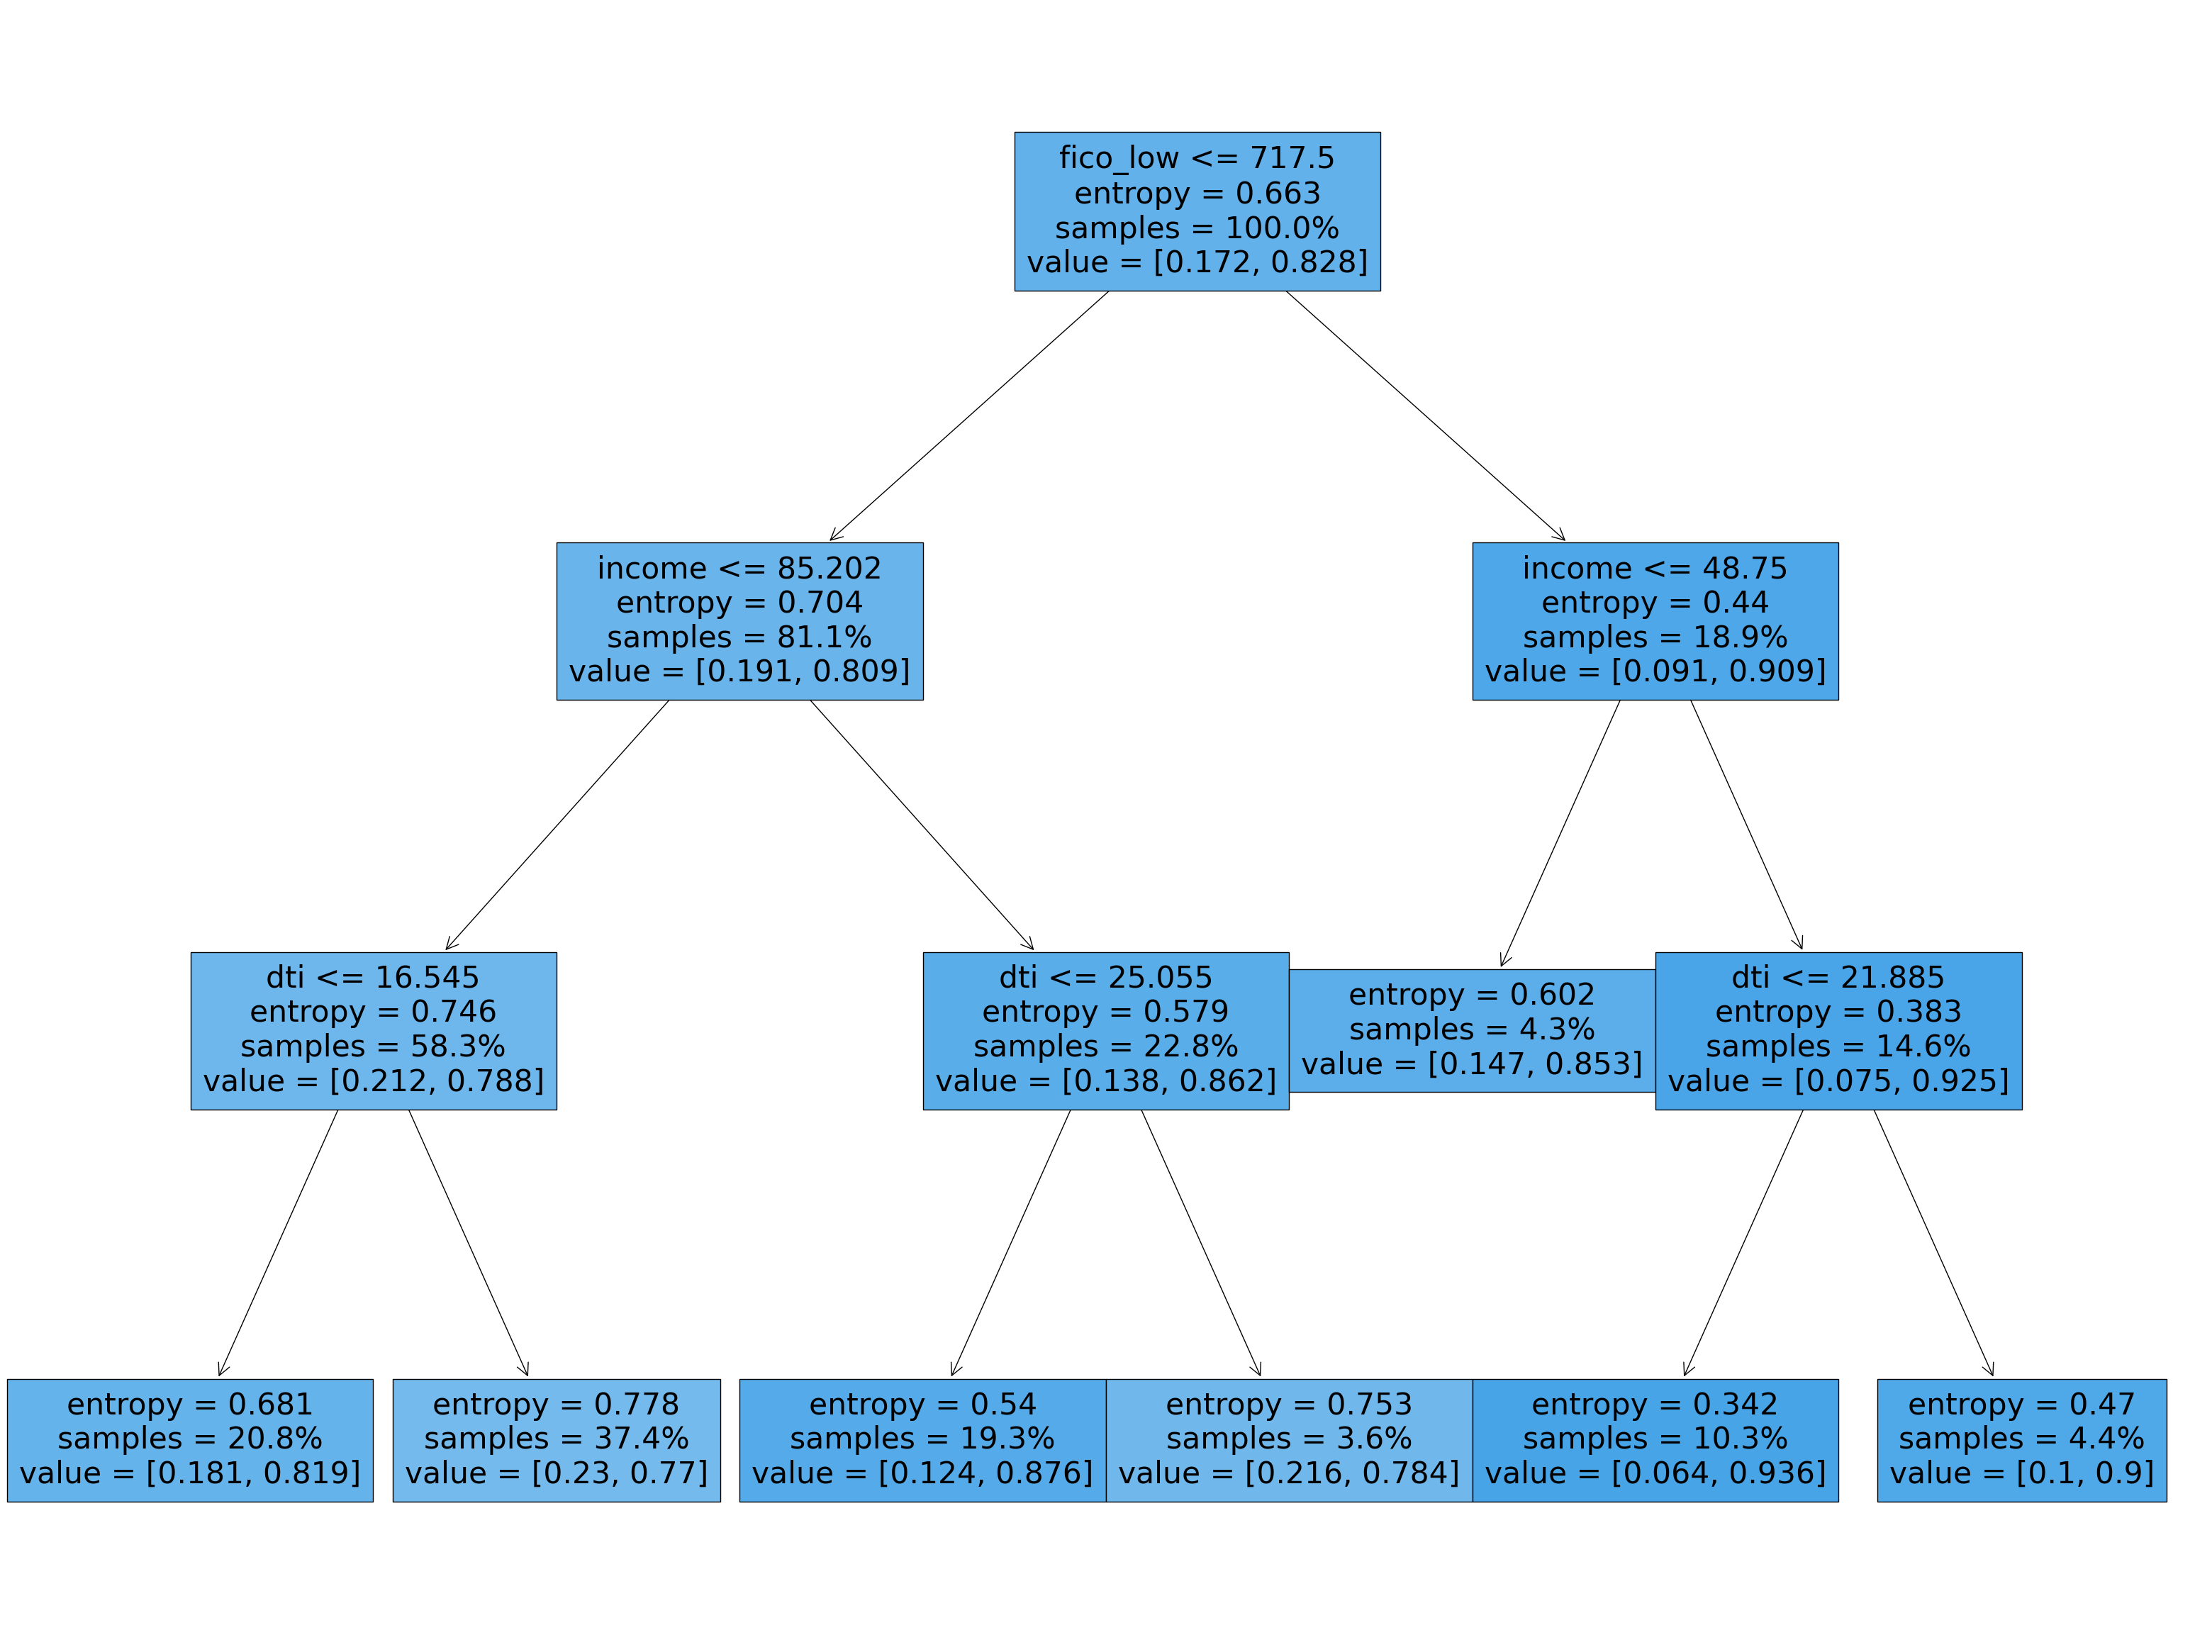

In [36]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=1000,min_samples_leaf=200,random_state=0)
clf = clf.fit(X,y)
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(clf, filled=True, feature_names=X.columns, proportion=True)
plt.show()

In [37]:
r = export_text(clf,feature_names=['Owns Home','Income','dti','FICO'])

In [38]:
print(r)

|--- FICO <= 717.50
|   |--- Income <= 85.20
|   |   |--- dti <= 16.55
|   |   |   |--- class: 1
|   |   |--- dti >  16.55
|   |   |   |--- class: 1
|   |--- Income >  85.20
|   |   |--- dti <= 25.05
|   |   |   |--- class: 1
|   |   |--- dti >  25.05
|   |   |   |--- class: 1
|--- FICO >  717.50
|   |--- Income <= 48.75
|   |   |--- class: 1
|   |--- Income >  48.75
|   |   |--- dti <= 21.88
|   |   |   |--- class: 1
|   |   |--- dti >  21.88
|   |   |   |--- class: 1



Let's make a test prediction ...

In [39]:
data = {
    'home_ownership'  :[1], 
    'income'          :[80],
    'dti'             :[20],
    'fico_low'        :[600]
}
check = pd.DataFrame(data)
check

,home_ownership,income,dti,fico_low
0,1,80,20,600


In [40]:
Q = clf.predict_proba(check)[:,1]
print(Q)

[0.77012907]


Now check the performance of the method.

In [41]:
#
# load file lendingclub_testdata.xlsx
#
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [42]:
test = pd.read_excel(path + 'lendingclub_testdata.xlsx', engine='openpyxl')
# 1 = good, 0 = default
print(test.head())

   home_ownership  income    dti  fico_low  loan_status
0               1   127.0  10.94       675            0
1               1   197.0  15.64       710            0
2               1    25.5  28.75       670            0
3               1    80.0  20.16       660            0
4               0    57.0  30.60       675            0


In [43]:
# remove target column to create feature only dataset
X_test = test.drop('loan_status',axis=1)
# store target column
y_test = test['loan_status']
y_pred = clf.predict(X_test)

**Note that for the default prediciton (i.e., with threshold=0.5), it totally missed all the bad loans**.

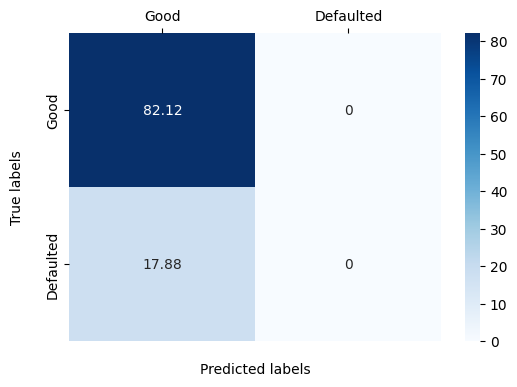

In [44]:
n_test = len(y_test)
cm = (confusion_matrix(y_test,y_pred,labels=[1, 0], sample_weight=None)/n_test)*100

plt.figure(figsize=(6, 4))      # format the plot size
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='.4g', cmap="Blues")
ax.set_xlabel('\nPredicted labels'); ax.set_ylabel('True labels\n')
ax.xaxis.tick_top()
ax.yaxis.set_ticklabels(['Good','Defaulted'],verticalalignment='center')
ax.xaxis.set_ticklabels(['Good','Defaulted'])
plt.show()

In [40]:
THRESHOLD = [.5, .75, .80, .85]
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "recall", "tnr", "fpr", "precision", "f1_score"]) # df to store results
results['THRESHOLD'] = THRESHOLD                                                                           # threshold column
n_test = len(y_test)
Q = clf.predict_proba(X_test)[:,1]
j = 0                                                                                                      
for i in THRESHOLD:      # iterate over each threshold  

    preds = np.where(Q > i, 1, 0)                                       # if prob > threshold, predict 1
    
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None)/n_test)*100 
    # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
   
    j += 1

print('ALL METRICS')
print(results.T.to_string(header=False))

Confusion matrix for threshold = 0.5
[[82.11629479  0.        ]
 [17.88370521  0.        ]]
 
Confusion matrix for threshold = 0.75
[[82.11629479  0.        ]
 [17.88370521  0.        ]]
 
Confusion matrix for threshold = 0.8
[[49.76335362 32.35294118]
 [ 8.5530764   9.3306288 ]]
 
Confusion matrix for threshold = 0.85
[[32.15010142 49.96619337]
 [ 4.73292765 13.15077755]]
 
ALL METRICS
THRESHOLD       0.5      0.75       0.8      0.85
accuracy   0.821163  0.821163   0.59094  0.453009
recall          1.0       1.0  0.606011  0.391519
tnr             0.0       0.0  0.521739   0.73535
fpr             1.0       1.0  0.478261   0.26465
precision  0.821163  0.821163  0.853333  0.871677
f1_score   0.901801  0.901801  0.708714  0.540341


In [41]:
# Compute the ROC curve and AUC
fpr, tpr, threshold = roc_curve(y_test, Q)
roc_auc = auc(fpr,tpr)
#
# calculate the g-mean for each threshold
#
gmeans = np.sqrt(tpr * (1-fpr))
#
# locate the index of the largest g-mean
#
ix = np.argmax(gmeans)
#
print(threshold[ix])

0.819436775262286


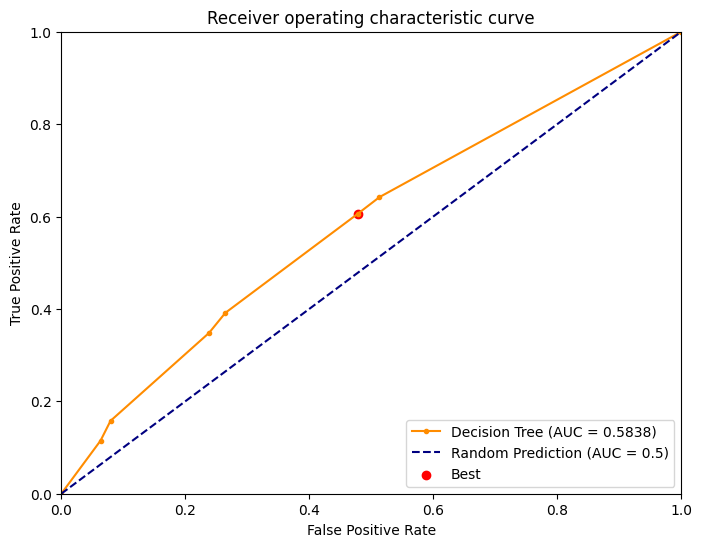

In [42]:
plt.figure(figsize=(8,6))      # format the plot size
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',lw=lw, label='Decision Tree (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random Prediction (AUC = 0.5)' )
plt.scatter(fpr[ix], tpr[ix], marker='o', color='red', label='Best')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

## Continuous Target Variables

A **Decision Tree** can be used to predict continuous values through a method called **Regression Trees**. Here’s a simple way to understand how it works:

**1. What’s the Goal?**

We want to predict a number (a continuous value). For example, let’s say we want to predict the **price of a house** based on features like **size, number of rooms, and location**.

**2. How Does a Decision Tree Work for Regression?**

Instead of just making a **yes/no** decision like in classification, a regression tree **splits the data into smaller and smaller groups** and then assigns each group an average value.

**3. Step-by-Step Example**

Let’s say we have a dataset of houses with these features:

| Size (m²) | Rooms | Price ($) |
|-----------|-------|----------|
| 50        | 2     | 100,000  |
| 60        | 2     | 120,000  |
| 70        | 3     | 150,000  |
| 90        | 3     | 200,000  |
| 100       | 4     | 220,000  |

**Step 1: Find the Best Split**

- The decision tree looks for a feature (e.g., **Size**) that best divides the dataset.
- It might split at **Size = 75 m²**.
  - **If Size ≤ 75 → Group 1**
  - **If Size > 75 → Group 2**

The value 75 (or any splitting point) is not chosen randomly—it’s found using a mathematical approach that minimizes prediction error. Here’s how: we need to find the best split point (e.g., Size = 75 m²) that makes our predictions as accurate as possible. The goal is to reduce the error in predicting the target variable (e.g., house price).

**Consider Possible Splits**

For the dataset:

| Size (m²) | Rooms | Price ($) |
|-----------|-------|----------|
| 50        | 2     | 100,000  |
| 60        | 2     | 120,000  |
| 70        | 3     | 150,000  |
| 90        | 3     | 200,000  |
| 100       | 4     | 220,000  |

We test different values as possible split points: **55, 65, 75, 85, 95**, etc.

**Calculate the Error for Each Split**

For each possible split, we:
1. **Divide the data** into two groups.
2. **Compute the average target value (price) in each group**.
3. **Calculate the total error** (usually measured as Mean Squared Error, MSE).

**Choose the Split That Minimizes Error**
The split that results in the **lowest MSE** is selected.

**Example: Testing Size = 75 as a Split**

Let’s check if splitting at **Size = 75** is a good choice:

1. **Group 1 (Size ≤ 75 m²)**
   - Houses: 50, 60, 70
   - Average Price = (100,000 + 120,000 + 150,000) / 3 = **123,333**

2. **Group 2 (Size > 75 m²)**
   - Houses: 90, 100
   - Average Price = (200,000 + 220,000) / 2 = **210,000**

3. **Calculate the Error (MSE)**
   - MSE for Group 1: \(\frac{(100,000 - 123,333)^2 + (120,000 - 123,333)^2 + (150,000 - 123,333)^2}{3}\)
   - MSE for Group 2: \(\frac{(200,000 - 210,000)^2 + (220,000 - 210,000)^2}{2}\)
   - Total MSE = sum of both errors.

If this is the **smallest MSE compared to other splits**, then **Size = 75** is chosen as the first split.

**Automating the Process**

Instead of manually testing each split, decision tree algorithms like **CART (Classification and Regression Trees)** automatically compute the **optimal split** using the MSE formula.

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


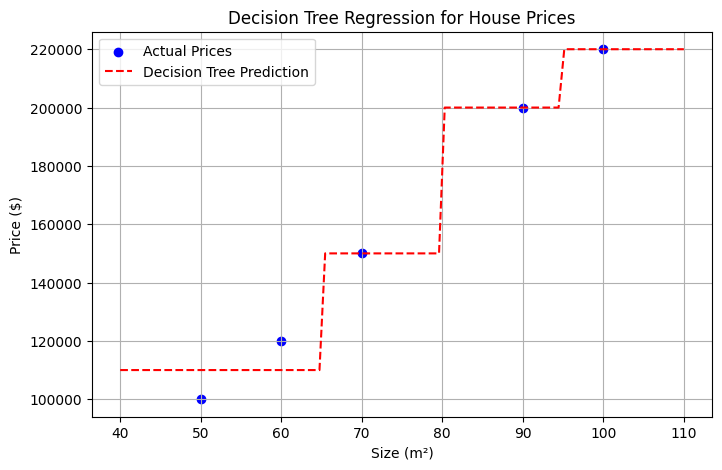

80.0

In [46]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Sample dataset: House Size vs Price
data = pd.DataFrame({
    "Size": [50, 60, 70, 90, 100],
    "Price": [100000, 120000, 150000, 200000, 220000]
})

# Separate features (X) and target variable (y)
X = data[["Size"]]
y = data["Price"]

# Train a Decision Tree Regressor (automatically finds the best split)
tree = DecisionTreeRegressor(max_depth=2)  # Limit depth to see splits clearly
tree.fit(X, y)

# Generate predictions for visualization
size_range = np.linspace(40, 110, 100).reshape(-1, 1)
predictions = tree.predict(size_range)

# Plot the decision tree regression
plt.figure(figsize=(8, 5))
plt.scatter(data["Size"], data["Price"], color="blue", label="Actual Prices")
plt.plot(size_range, predictions, color="red", linestyle="dashed", label="Decision Tree Prediction")
plt.xlabel("Size (m²)")
plt.ylabel("Price ($)")
plt.title("Decision Tree Regression for House Prices")
plt.legend()
plt.grid(True)
plt.show()

# Extracting the best split point
split_point = tree.tree_.threshold[0]  # First split in the tree
split_point

**Step 2: Keep Splitting**

- The tree keeps dividing the groups further, for example:
  - **Group 1 (Size ≤ 75 m²) might be split based on the number of rooms**.
  - **Group 2 (Size > 75 m²) might be split at Size = 95 m²**.

**Step 3: Assign a Prediction**

- Once the tree can’t split anymore (or reaches a stopping rule), it assigns a **prediction** to each group.
- The prediction is simply the **average price** of the houses in that group.

For example:
- **Group 1 (Size ≤ 75 m²):** Houses in this group have an average price of **123,333 $**.
- **Group 2 (Size > 75 m² and ≤ 95 m²):** Average price **175,000 $**.
- **Group 3 (Size > 95 m²):** Average price **220,000 $**.

**4. How Do We Use This Tree?**

If we want to predict the price of a new house:
- If it’s **80 m²**, we follow the splits and find its predicted price from the nearest group.

**5. Key Points**

- **Regression trees** predict **numbers** (not categories).
- They **split** data into smaller groups.
- The final prediction is the **average** value of the group.

### Exercise: Predicting House Prices

We will illustrate this procedure for the house price data considered in the previous notebook (see also J. C. Hull Chapter 3). To keep the example manageable we consider only two features: Overall Quality (scale 1 to 10) and Living Area (Square Feet).

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import roc_curve, auc, average_precision_score
import math

In [44]:
#
# load file IOWA_Training_Data.xlsx
#
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [45]:
train = pd.read_excel(path + 'IOWA_Training_Data.xlsx', engine='openpyxl')
# 1 = good, 0 = default
print(train.head())

   OverallQual  GrLivArea  Sale Price
0            7       1710       208.5
1            6       1262       181.5
2            7       1786       223.5
3            7       1717       140.0
4            8       2198       250.0


In [46]:
# remove target column to create feature only dataset
X_train = train.drop('Sale Price',axis=1)
# store target column
y_train = train['Sale Price']
print(X_train.shape, y_train.shape)

(1800, 2) (1800,)


In [47]:
X_train.columns = ['OverallQual','GrLivArea']
X_train.head()

,OverallQual,GrLivArea
0,7,1710
1,6,1262
2,7,1786
3,7,1717
4,8,2198


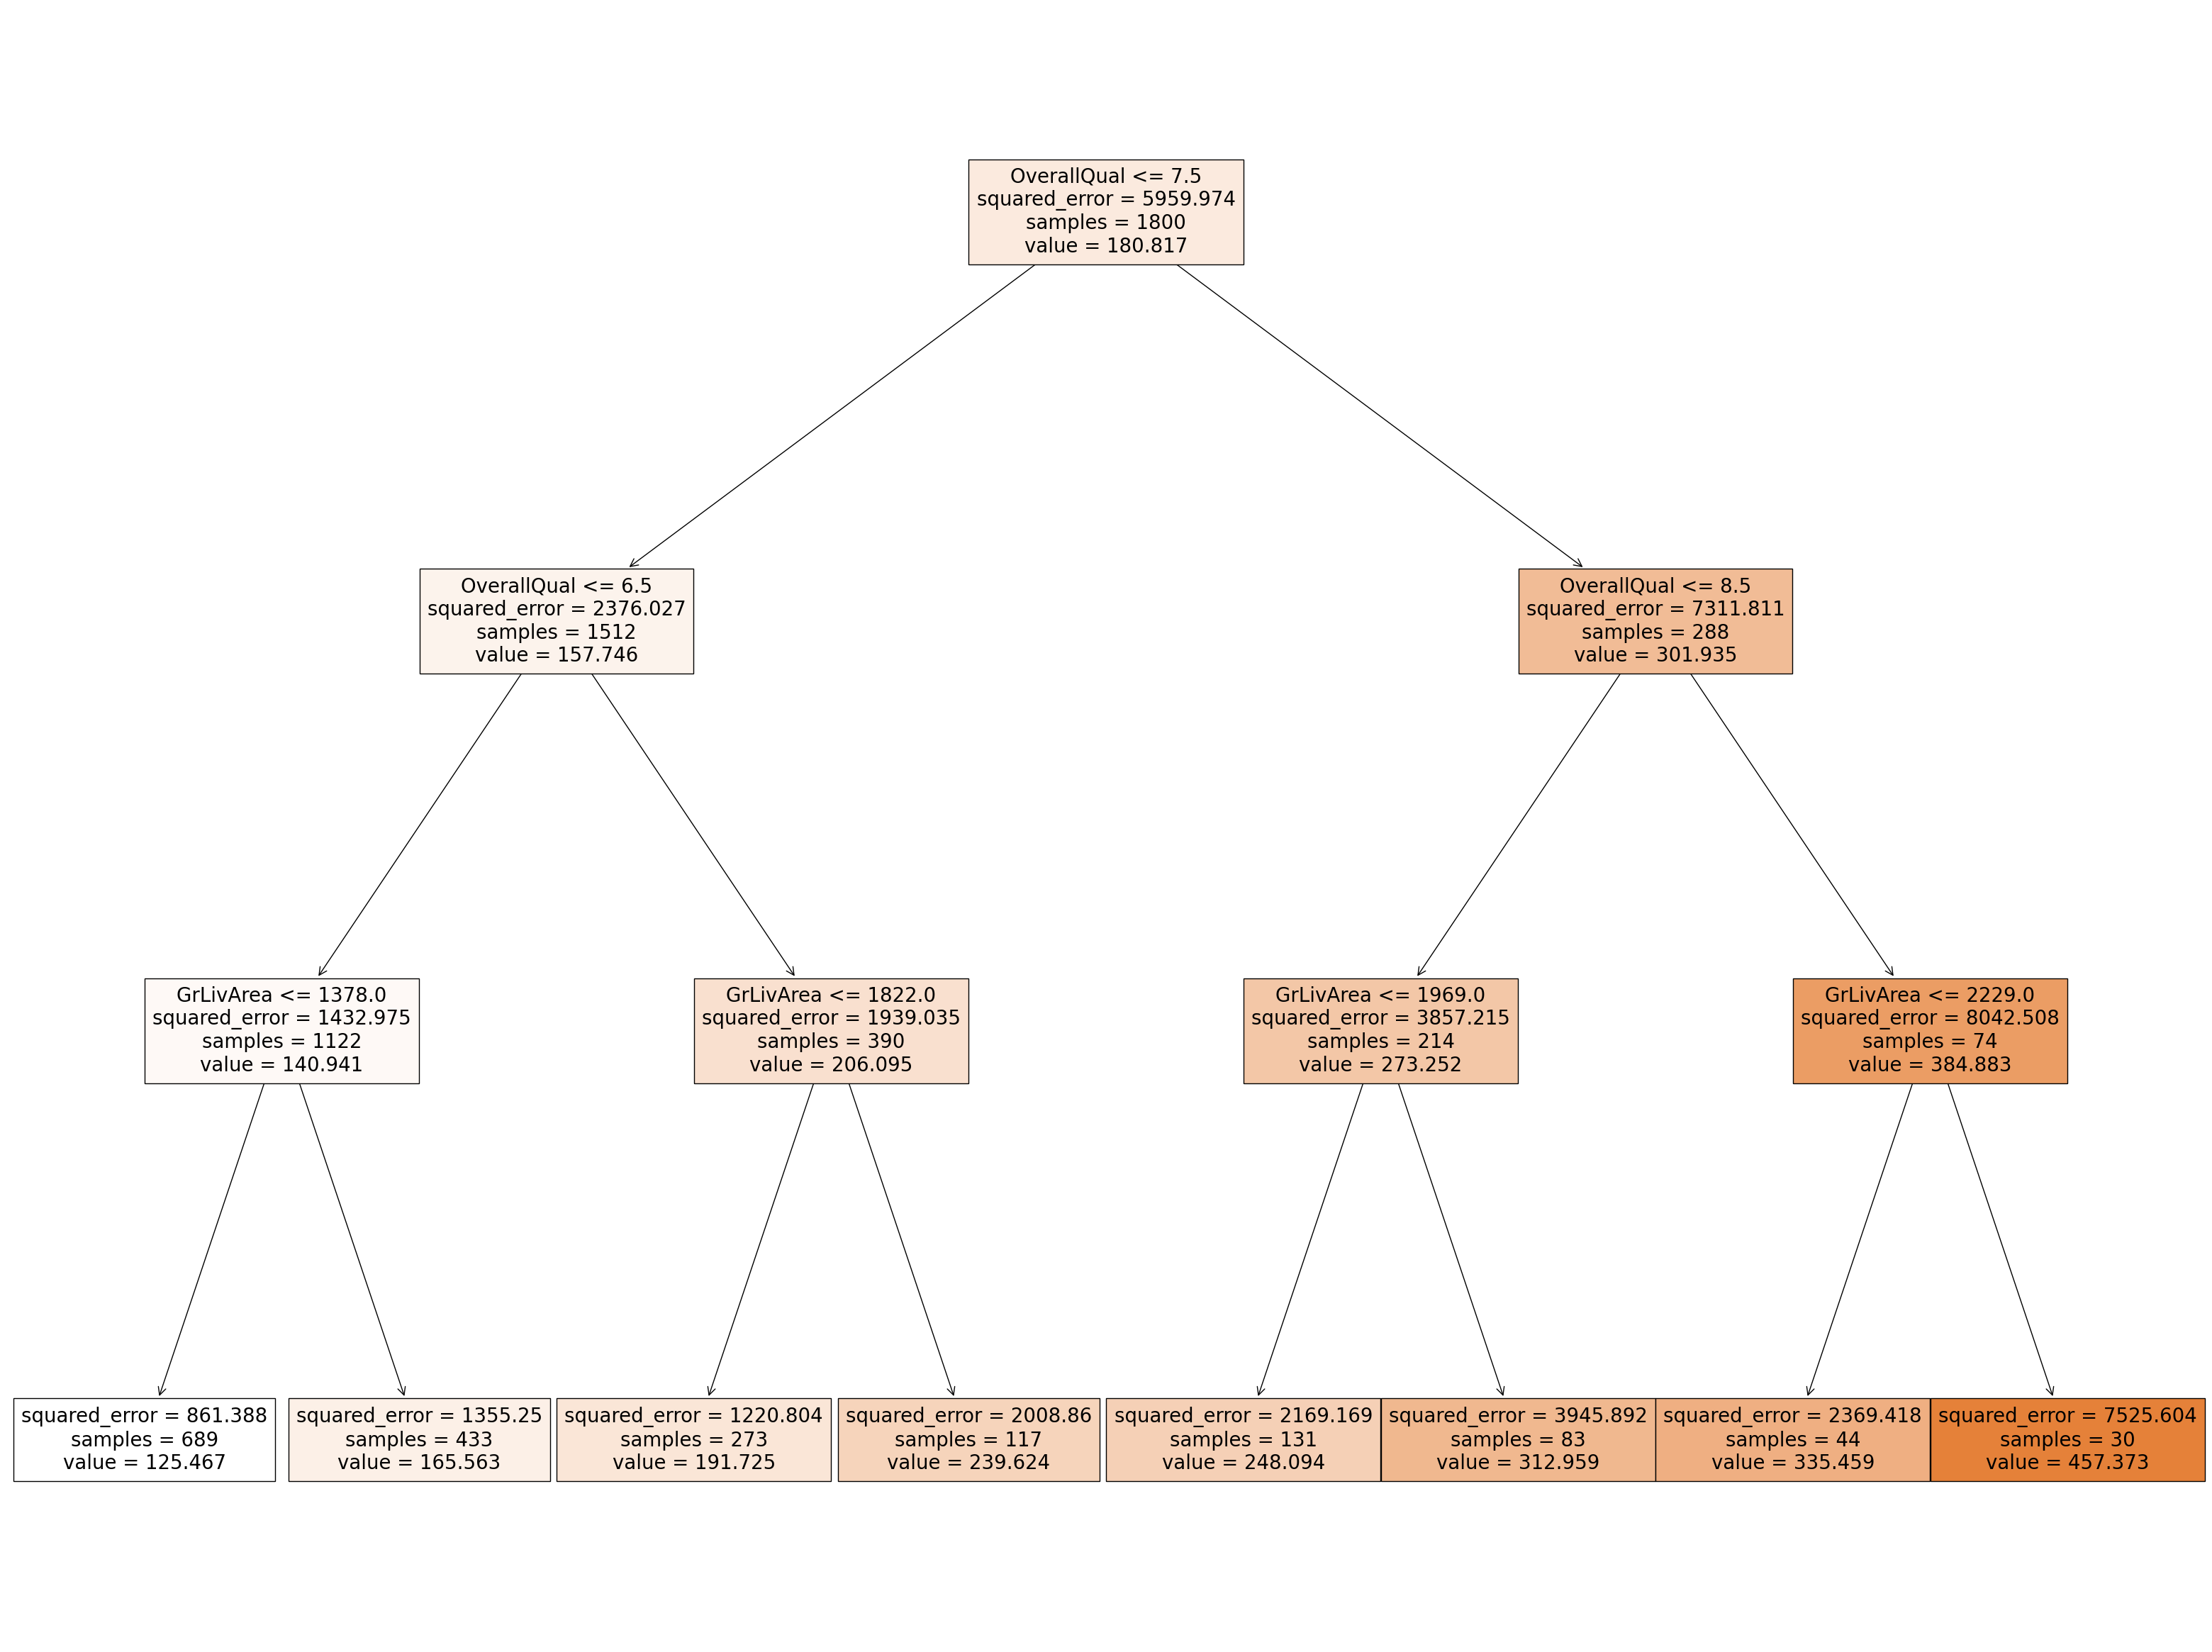

In [48]:
pred = DecisionTreeRegressor(criterion='squared_error',max_depth=3,random_state=0)
pred = pred.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(pred, filled=True, feature_names=X_train.columns, proportion=False)
plt.show()

In [49]:
r = export_text(pred,feature_names=['OverallQual','GrLivArea'])

In [50]:
print(r)

|--- OverallQual <= 7.50
|   |--- OverallQual <= 6.50
|   |   |--- GrLivArea <= 1378.00
|   |   |   |--- value: [125.47]
|   |   |--- GrLivArea >  1378.00
|   |   |   |--- value: [165.56]
|   |--- OverallQual >  6.50
|   |   |--- GrLivArea <= 1822.00
|   |   |   |--- value: [191.72]
|   |   |--- GrLivArea >  1822.00
|   |   |   |--- value: [239.62]
|--- OverallQual >  7.50
|   |--- OverallQual <= 8.50
|   |   |--- GrLivArea <= 1969.00
|   |   |   |--- value: [248.09]
|   |   |--- GrLivArea >  1969.00
|   |   |   |--- value: [312.96]
|   |--- OverallQual >  8.50
|   |   |--- GrLivArea <= 2229.00
|   |   |   |--- value: [335.46]
|   |   |--- GrLivArea >  2229.00
|   |   |   |--- value: [457.37]



In [51]:
#
# load file IOWA_Validation_Data.xlsx
#
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [52]:
validation = pd.read_excel(path + 'IOWA_Validation_Data.xlsx', engine = 'openpyxl')
# 1 = good, 0 = default
print(validation.head())

   OverallQual  GrLivArea  Sale Price
0            6       1045       127.0
1            6       1378       128.9
2            6       1944       103.5
3            5       1306       130.0
4            5       1464       129.0


In [53]:
# remove target column to create feature only dataset
X_validation = validation.drop('Sale Price',axis=1)
# store target column
y_validation = validation['Sale Price']
print(X_validation.shape, y_validation.shape)
X_validation.head()

(600, 2) (600,)


,OverallQual,GrLivArea
0,6,1045
1,6,1378
2,6,1944
3,5,1306
4,5,1464


In [54]:
#
# load file IOWA_Test_Data.xlsx
#
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [55]:
test = pd.read_excel(path + 'IOWA_Test_Data.xlsx', engine='openpyxl')
# 1 = good, 0 = default
print(test.head())

   OverallQual  GrLivArea  Sale Price
0            5       1053      142.10
1            5       1144      120.00
2            6       1721      174.85
3            5        922      116.00
4            5       1411      130.00


In [56]:
# remove target column to create feature only dataset
X_test = test.drop('Sale Price',axis=1)
# store target column
y_test = test['Sale Price']
print(X_test.shape, y_test.shape)

(508, 2) (508,)


In [57]:
y_pred_train=pred.predict(X_train)
mse = mean_squared_error(y_pred_train,y_train)
rmse=math.sqrt(mse)
print("rmse for training set")
print(rmse)

rmse for training set
38.660405648678584


In [58]:
y_pred_validation=pred.predict(X_validation)
mse = mean_squared_error(y_pred_validation,y_validation)
rmse=math.sqrt(mse)
print("rmse for validation set")
print(rmse)

rmse for validation set
40.462035147026455


In [59]:
y_pred_test=pred.predict(X_test)
mse = mean_squared_error(y_pred_test,y_test)
rmse=math.sqrt(mse)
print("rmse for test set")
print(rmse)

rmse for test set
39.048800554631995


## Random Forest

The random forest method is a versatile and powerful machine learning algorithm used primarily for classification and regression tasks. It is an ensemble method, which means it combines the predictions of multiple individual models (in this case decision trees) to achieve better performance and robustness than a single model.

At its core, the random forest works by building a large number of decision trees during training. Each tree is trained on a random subset of the data, and at each decision point (or split) in a tree, it selects a random subset of features to determine the best split. These two randomization steps—sampling the data and selecting a subset of features—help the model avoid overfitting, which is a common issue with individual decision trees.

The training process involves the following steps: first, the algorithm creates multiple bootstrap samples from the original dataset by sampling with replacement. Each bootstrap sample will likely exclude some of the original data points (called out-of-bag samples), which can be used later to estimate model performance. For each bootstrap sample, the algorithm grows a decision tree to its maximum depth without pruning, but at each split, it considers only a random subset of features to find the best split. This randomness reduces correlation between the trees and leads to more diverse models in the ensemble.

Once the forest of decision trees is trained, the random forest makes predictions by aggregating the outputs of the individual trees. For classification tasks, this aggregation typically involves a majority vote, where the class predicted most often by the trees is chosen as the final prediction. For regression tasks, the predictions of the trees are averaged to produce the final output.

One of the key advantages of the random forest method is its ability to handle a large number of features, including irrelevant ones, without significant overfitting. It also provides a measure of feature importance, which can help identify the most relevant variables in the dataset.

Here is an example of how to use the random forest algorithm in Python for both classification and regression:

### Classification Example

In [61]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.2f}")

Classification Accuracy: 1.00


### Regression Example

In [63]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.26


In the classification example, we use the Iris dataset, which contains information about different species of flowers, to build a model that predicts the species of a flower based on its measurements. In the regression example, we use the Boston housing dataset to predict housing prices based on various features. These examples demonstrate how to quickly implement the random forest algorithm using the `scikit-learn` library, one of the most popular machine learning libraries in Python.

The reason that the random forest model works is that a large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models. The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. 

## References and Credits